In [59]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
np.random.seed(1)
from shapefinder import Shape,finder
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
import os
from cycler import cycler
import matplotlib.patches as patches

In [60]:
# Plot parameters 
plot_params = {"text.usetex":True,"font.family":"serif","font.size":30,"xtick.labelsize":30,"ytick.labelsize":30,"axes.labelsize":30,"figure.titlesize":30,"figure.figsize":(8,5),"axes.prop_cycle":cycler(color=['black','rosybrown','gray','indianred','red','maroon','silver',])}
plt.rcParams.update(plot_params)

In [61]:
### Define out paths ------
home = '/Users/hannahfrank/'
if not os.path.exists(os.path.join(home,'desktop/Views_competition_out')):
    os.makedirs(os.path.join(home,'desktop/Views_competition_out'))

out_paths = {"plots": os.path.join(home,'desktop/Views_competition_out/plots'),
    "data": os.path.join(home,'desktop/Views_competition_out/data'),
    "analysis": os.path.join(home,'desktop/Views_competition_out/analysis'),}

for key, val in out_paths.items():
    if not os.path.exists(val):
        os.makedirs(val)

In [220]:
df_tot_tot=pd.read_csv('data.csv',index_col=0)
bench1_tot = pd.read_csv('bench1.csv',index_col=0)
bench2_tot = pd.read_csv('bench2.csv',index_col=0)

tot_df_nn=pd.read_csv('10_h15.csv',index_col=0)
tot_df_ar=pd.read_csv('ar.csv',index_col=0)
tot_df_ar2=pd.read_csv('ar2.csv',index_col=0)
tot_df_obs=pd.read_csv('obs.csv',index_col=0)

In [221]:
scaler=MinMaxScaler((0,1))
df = scaler.fit_transform(df_tot_tot) 
df=pd.DataFrame(df)
tot_df_nn=tot_df_nn.fillna(0)
tot_df_nn=scaler.transform(tot_df_nn)
tot_df_nn=pd.DataFrame(tot_df_nn)
tot_df_ar=scaler.transform(tot_df_ar)
tot_df_ar=pd.DataFrame(tot_df_ar)
tot_df_ar2=scaler.transform(tot_df_ar2)
tot_df_ar2=pd.DataFrame(tot_df_ar2)
tot_df_obs=scaler.transform(tot_df_obs)
tot_df_obs=pd.DataFrame(tot_df_obs)
err_nn=[]
err_b=[]
err_b2=[]

In [222]:
tot_df_nn

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.501524,0.0,0.0,0.0,0.005181,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.614095,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.424129,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.371216,0.0,0.0,0.0,0.000000,0.004199
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.307939,0.0,0.0,0.0,0.000000,0.004982
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100019,0.0,0.0,0.0,0.004480,0.002908
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.362126,0.0,0.0,0.0,0.000000,0.003389
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.331038,0.0,0.0,0.0,0.005276,0.003820
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.506041,0.0,0.0,0.0,0.007577,0.008207
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.364993,0.0,0.0,0.0,0.000000,0.004098


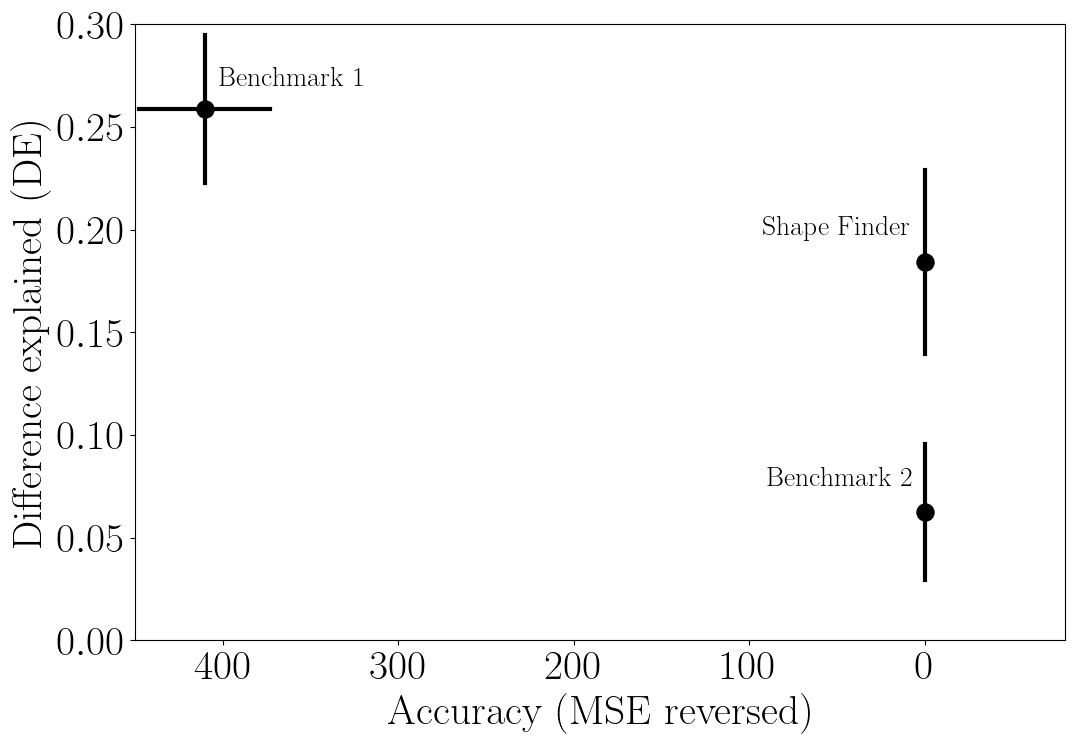

In [64]:
for i in range(len(tot_df_nn.columns)):
    for y in range(4):
        err_nn.append(mean_squared_error(tot_df_obs.iloc[y*12:(y+1)*12,i], tot_df_nn.iloc[y*12:(y+1)*12,i]))
        err_b.append(mean_squared_error(tot_df_obs.iloc[y*12:(y+1)*12,i], tot_df_ar.iloc[y*12:(y+1)*12,i]))
        err_b2.append(mean_squared_error(tot_df_obs.iloc[y*12:(y+1)*12,i], tot_df_ar2.iloc[y*12:(y+1)*12,i]))
    err_nn.append(mean_squared_error(tot_df_obs.iloc[:,i], tot_df_nn.iloc[:,i]))
    err_b.append(mean_squared_error(tot_df_obs.iloc[:,i], tot_df_ar.iloc[:,i]))
    err_b2.append(mean_squared_error(tot_df_obs.iloc[:,i], tot_df_ar2.iloc[:,i]))

err_nn = np.array(err_nn).reshape((5,191),order='F')
err_b = np.array(err_b).reshape((5,191),order='F')
err_b2 = np.array(err_b2).reshape((5,191),order='F')

d_mse = err_nn/err_b2

x_labels = ['Bench1','Bench2']
mea_2=(err_b2[:4, :].flatten()-err_nn[:4, :].flatten())
mea_1=(err_b[:4, :].flatten()-err_nn[:4, :].flatten())
means = [mea_1.mean(),mea_2.mean(),err_nn[:4, :].flatten().mean()]
std_error = [2*mea_1.std()/np.sqrt(len(mea_1)),2*mea_2.std()/np.sqrt(len(mea_2)),2*err_nn[:4, :].flatten().std()/np.sqrt(len(err_nn[:4, :].flatten()))]
mean2_data = pd.DataFrame({
    'mean': means,
    'std': std_error
})

d_nn=[]
d_b=[]
d_b2=[]
k=5
for i in range(len(tot_df_nn.columns)):
    for y in range(4):
        real = tot_df_obs.iloc[y*12:(y+1)*12,i]
        real=real.reset_index(drop=True)
        sf=tot_df_nn.iloc[y*12:(y+1)*12,i]
        sf=sf.reset_index(drop=True)
        b1=tot_df_ar.iloc[y*12:(y+1)*12,i]
        b1=b1.reset_index(drop=True)
        b2=tot_df_ar2.iloc[y*12:(y+1)*12,i]
        b2=b2.reset_index(drop=True)
        max_s=0
        max_b1=0
        max_b2=0
        if (real==0).all()==False:
            for value in real[1:].index:
                # if ((real[value]<1.05*real[value-1]) and (real[value]>0.95*real[value-1])) or (real[value-1]==0 and real[value]==0):
                #     1
                if (real[value]==real[value-1]):
                    1
                else:
                    max_exp=0
                    if (real[value]-real[value-1])/(sf[value]-sf[value-1])>0 and sf[value]-sf[value-1] != 0:
                        t=abs(((real[value]-real[value-1])-(sf[value]-sf[value-1]))/(real[value]-real[value-1]))
                        max_exp = np.exp(-(k*t))
                    else:
                        if value==11:
                            if (real[value]-real[value-1])/(sf[value-1]-sf[value-2])>0 and sf[value-1]-sf[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(sf[value-1]-sf[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        elif value==1:
                            if (real[value]-real[value-1])/(sf[value+1]-sf[value])>0 and sf[value+1]-sf[value] != 0:
                                t=abs(((real[value]-real[value-1])-(sf[value+1]-sf[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        else : 
                            if (real[value]-real[value-1])/(sf[value-1]-sf[value-2])>0 and sf[value-1]-sf[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(sf[value-1]-sf[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                            if (real[value]-real[value-1])/(sf[value+1]-sf[value])>0 and sf[value+1]-sf[value] != 0:
                                t=abs(((real[value]-real[value-1])-(sf[value+1]-sf[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                    max_s=max_s+max_exp   
                
                    max_exp=0
                    if (real[value]-real[value-1])/(b1[value]-b1[value-1])>0 and b1[value]-b1[value-1] != 0:
                        t=abs(((real[value]-real[value-1])-(b1[value]-b1[value-1]))/(real[value]-real[value-1]))
                        max_exp = np.exp(-(k*t))
                    else:
                        if value==11:
                            if (real[value]-real[value-1])/(b1[value-1]-b1[value-2])>0 and b1[value-1]-b1[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(b1[value-1]-b1[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        elif value==1:
                            if (real[value]-real[value-1])/(b1[value+1]-b1[value])>0 and b1[value+1]-b1[value] != 0:
                                t=abs(((real[value]-real[value-1])-(b1[value+1]-b1[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        else : 
                            if (real[value]-real[value-1])/(b1[value-1]-b1[value-2])>0 and b1[value-1]-b1[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(b1[value-1]-b1[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                            if (real[value]-real[value-1])/(b1[value+1]-b1[value])>0 and b1[value+1]-b1[value] != 0:
                                t=abs(((real[value]-real[value-1])-(b1[value+1]-b1[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                    max_b1=max_b1+max_exp 
                    
                    max_exp=0
                    if (real[value]-real[value-1])/(b2[value]-b2[value-1])>0 and b2[value]-b2[value-1] != 0:
                        t=abs(((real[value]-real[value-1])-(b2[value]-b2[value-1]))/(real[value]-real[value-1]))
                        max_exp = np.exp(-(k*t))
                    else:
                        if value==11:
                            if (real[value]-real[value-1])/(b2[value-1]-b2[value-2])>0 and b2[value-1]-b2[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(b2[value-1]-b2[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        elif value==1:
                            if (real[value]-real[value-1])/(b2[value+1]-b2[value])>0 and b2[value+1]-b2[value] != 0:
                                t=abs(((real[value]-real[value-1])-(b2[value+1]-b2[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        else : 
                            if (real[value]-real[value-1])/(b2[value-1]-b2[value-2])>0 and b2[value-1]-b2[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(b2[value-1]-b2[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-t):
                                    max_exp = np.exp(-(k*t))
                            if (real[value]-real[value-1])/(b2[value+1]-b2[value])>0 and b2[value+1]-b2[value] != 0:
                                t=abs(((real[value]-real[value-1])-(b2[value+1]-b2[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                    max_b2=max_b2+max_exp         
                
        d_nn.append(max_s)
        d_b.append(max_b1)
        d_b2.append(max_b2)        

d_nn = np.array(d_nn).reshape((4,191),order='F')
d_b = np.array(d_b).reshape((4,191),order='F')
d_b2 = np.array(d_b2).reshape((4,191),order='F')

x_labels = ['Bench1','Bench2']
mea_2=(d_nn[:4, :].flatten()-d_b2[:4, :].flatten())
mea_1=(d_nn[:4, :].flatten()-d_b[:4, :].flatten())
means = [mea_1.mean(),mea_2.mean(),d_b2[:4, :].flatten().mean()]
std_de = [2*mea_1.std()/np.sqrt(len(mea_1)),2*mea_2.std()/np.sqrt(len(mea_2)),2*d_b[:4, :].flatten().std()/np.sqrt(len(d_b[:4, :].flatten()))]
mean2_data = pd.DataFrame({
    'mean': means,
    'std': std_de
})

fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(err_nn[:4, :].flatten().mean(),d_nn[:4, :].flatten().mean(),color="black",s=150)
plt.scatter(err_b[:4, :].flatten().mean(),d_b[:4, :].flatten().mean(),color="black",s=150)
plt.scatter(err_b2[:4, :].flatten().mean(),d_b2[:4, :].flatten().mean(),color="black",s=150)

# Benchmark 1
plt.plot([err_b[:4, :].flatten().mean(),err_b[:4, :].flatten().mean()],[d_b[:4, :].flatten().mean()-std_de[0],d_b[:4, :].flatten().mean()+std_de[0]],linewidth=3)
plt.plot([err_b[:4, :].flatten().mean()-std_error[0],err_b[:4, :].flatten().mean()+std_error[0]],[d_b[:4, :].flatten().mean(),d_b[:4, :].flatten().mean()],linewidth=3,color="black")

# Benchmark 2
plt.plot([err_b2[:4, :].flatten().mean(),err_b2[:4, :].flatten().mean()],[d_b2[:4, :].flatten().mean()-std_de[1],d_b2[:4, :].flatten().mean()+std_de[1]],linewidth=3,color="black")
plt.plot([err_b2[:4, :].flatten().mean()-std_error[1],err_b2[:4, :].flatten().mean()+std_error[1]],[d_b2[:4, :].flatten().mean(),d_b2[:4, :].flatten().mean()],linewidth=3,color="black")

# Shape Finder
plt.plot([err_nn[:4, :].flatten().mean(),err_nn[:4, :].flatten().mean()],[d_nn[:4, :].flatten().mean()-std_de[2],d_nn[:4, :].flatten().mean()+std_de[2]],linewidth=3,color="black")
plt.plot([err_nn[:4, :].flatten().mean()-std_error[2],err_nn[:4, :].flatten().mean()+std_error[2]],[d_nn[:4, :].flatten().mean(),d_nn[:4, :].flatten().mean()],linewidth=3,color="black")

plt.xlabel("Accuracy (MSE reversed)")
plt.ylabel("Difference explained (DE)")

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=12,ncol=3)
ax.set_ylim([0, 0.3])
ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3])
ax.set_xlim([-80, 450])
ax.invert_xaxis()
plt.text(402, 0.27, "Benchmark 1", size=20, color='black')
plt.text(90, 0.075, "Benchmark 2", size=20, color='black')
plt.text(92, 0.197, "Shape Finder", size=20, color='black')
plt.savefig(os.path.join(out_paths["analysis"],f"scatter.jpeg"),dpi=400,bbox_inches="tight")


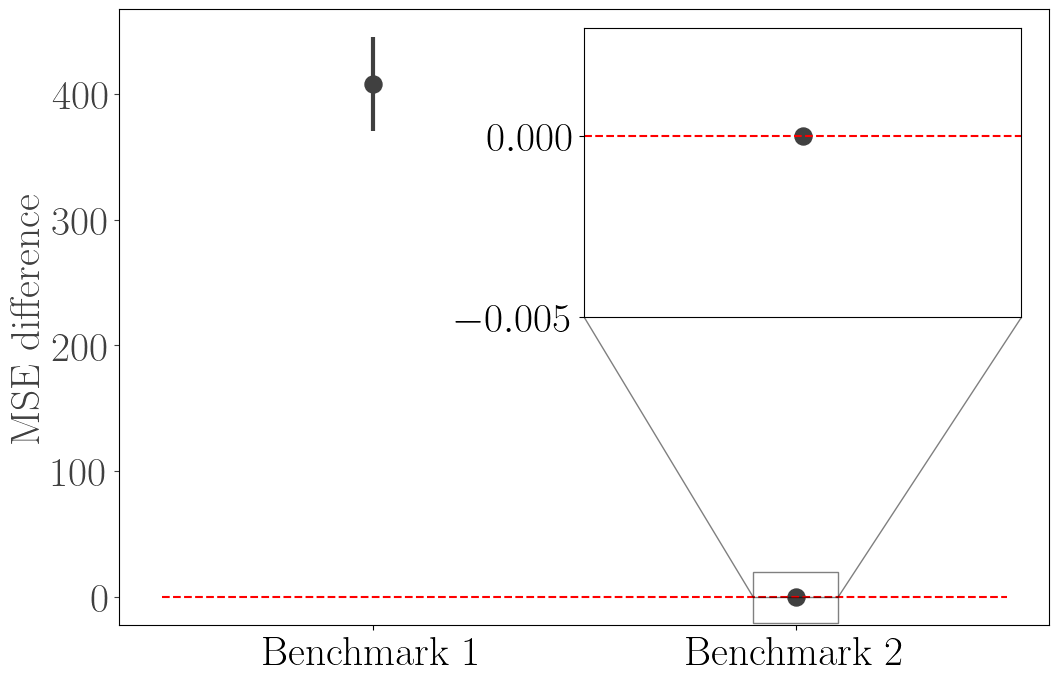

In [65]:
scaler=MinMaxScaler((0,1))
df = scaler.fit_transform(df_tot_tot) 
df=pd.DataFrame(df)
tot_df_nn=tot_df_nn.fillna(0)
tot_df_nn=scaler.transform(tot_df_nn)
tot_df_nn=pd.DataFrame(tot_df_nn)
tot_df_ar=scaler.transform(tot_df_ar)
tot_df_ar=pd.DataFrame(tot_df_ar)
tot_df_ar2=scaler.transform(tot_df_ar2)
tot_df_ar2=pd.DataFrame(tot_df_ar2)
tot_df_obs=scaler.transform(tot_df_obs)
tot_df_obs=pd.DataFrame(tot_df_obs)
err_nn=[]
err_b=[]
err_b2=[]

for i in range(len(tot_df_nn.columns)):
    for y in range(4):
        err_nn.append(mean_squared_error(tot_df_obs.iloc[y*12:(y+1)*12,i], tot_df_nn.iloc[y*12:(y+1)*12,i]))
        err_b.append(mean_squared_error(tot_df_obs.iloc[y*12:(y+1)*12,i], tot_df_ar.iloc[y*12:(y+1)*12,i]))
        err_b2.append(mean_squared_error(tot_df_obs.iloc[y*12:(y+1)*12,i], tot_df_ar2.iloc[y*12:(y+1)*12,i]))
    err_nn.append(mean_squared_error(tot_df_obs.iloc[:,i], tot_df_nn.iloc[:,i]))
    err_b.append(mean_squared_error(tot_df_obs.iloc[:,i], tot_df_ar.iloc[:,i]))
    err_b2.append(mean_squared_error(tot_df_obs.iloc[:,i], tot_df_ar2.iloc[:,i]))

err_nn = np.array(err_nn).reshape((5,191),order='F')
err_b = np.array(err_b).reshape((5,191),order='F')
err_b2 = np.array(err_b2).reshape((5,191),order='F')

d_mse = err_nn/err_b2

x_labels = ['Bench1','Bench2']
mea_2=(err_b2[:4, :].flatten()-err_nn[:4, :].flatten())
mea_1=(err_b[:4, :].flatten()-err_nn[:4, :].flatten())
means = [mea_1.mean(),mea_2.mean()]
std = [2*mea_1.std()/np.sqrt(len(mea_1)),2*mea_2.std()/np.sqrt(len(mea_2))]
mean2_data = pd.DataFrame({
    'mean': means,
    'std': std
})

blue_color = '#404040'  # Dark grey shade
orange_color = '#A0A0A0'  # Light grey shade
def mse_formatter(x, pos):
    return '{:.1e}'.format(x)
def improvement_formatter(x, pos):
    return '{:.1e}'.format(x)

plt.figure(figsize=(12,8))
ax = plt.axes()
marker_size = 150
linewidth = 3
fonts=25
plt.rc('font', size=24)
plt.ylabel('MSE difference',color=blue_color)
plt.tick_params(axis='y', colors=blue_color)
plt.scatter(mean2_data.index, mean2_data['mean'], color=blue_color, marker='o', s=marker_size)
plt.errorbar(mean2_data.index, mean2_data['mean'], yerr=mean2_data['std'], fmt='none', color=blue_color, linewidth=linewidth)
plt.grid(False)
plt.hlines(0,-0.5,1.5,linestyles='--',color='r')
plt.xticks([0,1],['Benchmark 1','Benchmark 2'])


# inset axes....
x1, x2, y1, y2 = 0.9, 1.1, -0.005, 0.003  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.scatter(mean2_data.index, mean2_data['mean'], color=blue_color, marker='o', s=marker_size)
axins.errorbar(mean2_data.index, mean2_data['mean'], yerr=mean2_data['std'], fmt='none', color=blue_color, linewidth=linewidth)
axins.hlines(0,-0.5,1.5,linestyles='--',color='r')
axins.set_xticks([])

ax.indicate_inset_zoom(axins, edgecolor="black")

# Create a Rectangle patch
rect = patches.Rectangle((0.9, -20), 0.2, 40, linewidth=1, edgecolor='gray', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

#plt.yscale('log')
plt.savefig(os.path.join(out_paths["analysis"],f"mse.jpeg"),dpi=400,bbox_inches="tight")
plt.show()

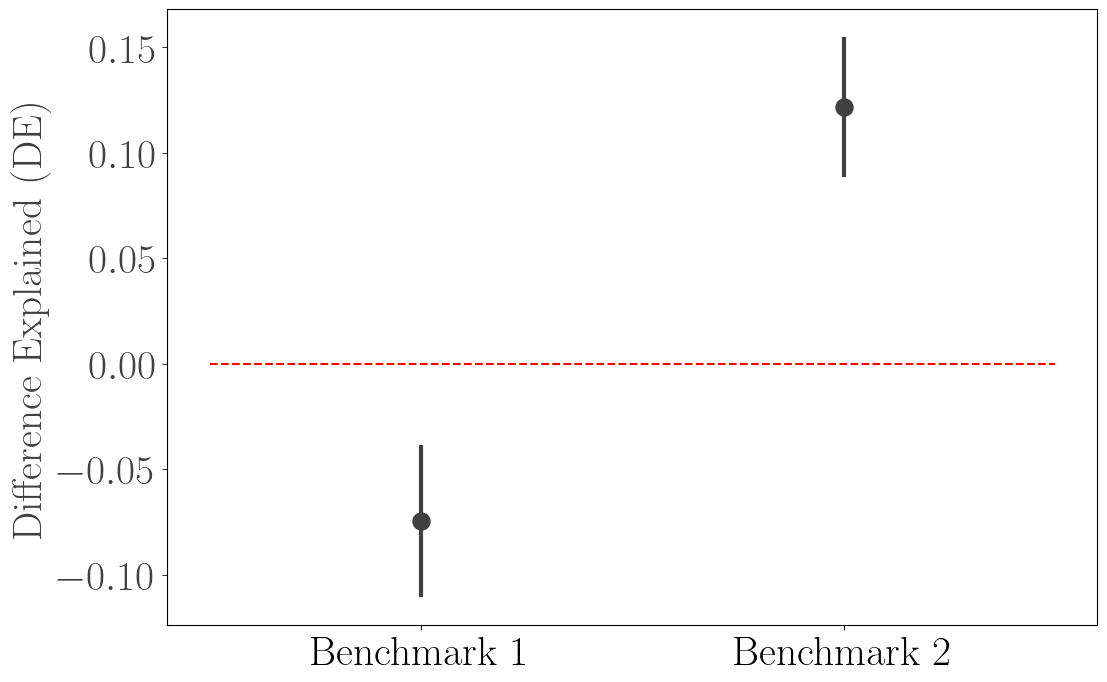

In [66]:
d_nn=[]
d_b=[]
d_b2=[]
k=5
for i in range(len(tot_df_nn.columns)):
    for y in range(4):
        real = tot_df_obs.iloc[y*12:(y+1)*12,i]
        real=real.reset_index(drop=True)
        sf=tot_df_nn.iloc[y*12:(y+1)*12,i]
        sf=sf.reset_index(drop=True)
        b1=tot_df_ar.iloc[y*12:(y+1)*12,i]
        b1=b1.reset_index(drop=True)
        b2=tot_df_ar2.iloc[y*12:(y+1)*12,i]
        b2=b2.reset_index(drop=True)
        max_s=0
        max_b1=0
        max_b2=0
        if (real==0).all()==False:
            for value in real[1:].index:
                # if ((real[value]<1.05*real[value-1]) and (real[value]>0.95*real[value-1])) or (real[value-1]==0 and real[value]==0):
                #     1
                if (real[value]==real[value-1]):
                    1
                else:
                    max_exp=0
                    if (real[value]-real[value-1])/(sf[value]-sf[value-1])>0 and sf[value]-sf[value-1] != 0:
                        t=abs(((real[value]-real[value-1])-(sf[value]-sf[value-1]))/(real[value]-real[value-1]))
                        max_exp = np.exp(-(k*t))
                    else:
                        if value==11:
                            if (real[value]-real[value-1])/(sf[value-1]-sf[value-2])>0 and sf[value-1]-sf[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(sf[value-1]-sf[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        elif value==1:
                            if (real[value]-real[value-1])/(sf[value+1]-sf[value])>0 and sf[value+1]-sf[value] != 0:
                                t=abs(((real[value]-real[value-1])-(sf[value+1]-sf[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        else : 
                            if (real[value]-real[value-1])/(sf[value-1]-sf[value-2])>0 and sf[value-1]-sf[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(sf[value-1]-sf[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                            if (real[value]-real[value-1])/(sf[value+1]-sf[value])>0 and sf[value+1]-sf[value] != 0:
                                t=abs(((real[value]-real[value-1])-(sf[value+1]-sf[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                    max_s=max_s+max_exp   
                
                    max_exp=0
                    if (real[value]-real[value-1])/(b1[value]-b1[value-1])>0 and b1[value]-b1[value-1] != 0:
                        t=abs(((real[value]-real[value-1])-(b1[value]-b1[value-1]))/(real[value]-real[value-1]))
                        max_exp = np.exp(-(k*t))
                    else:
                        if value==11:
                            if (real[value]-real[value-1])/(b1[value-1]-b1[value-2])>0 and b1[value-1]-b1[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(b1[value-1]-b1[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        elif value==1:
                            if (real[value]-real[value-1])/(b1[value+1]-b1[value])>0 and b1[value+1]-b1[value] != 0:
                                t=abs(((real[value]-real[value-1])-(b1[value+1]-b1[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        else : 
                            if (real[value]-real[value-1])/(b1[value-1]-b1[value-2])>0 and b1[value-1]-b1[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(b1[value-1]-b1[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                            if (real[value]-real[value-1])/(b1[value+1]-b1[value])>0 and b1[value+1]-b1[value] != 0:
                                t=abs(((real[value]-real[value-1])-(b1[value+1]-b1[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                    max_b1=max_b1+max_exp 
                    
                    max_exp=0
                    if (real[value]-real[value-1])/(b2[value]-b2[value-1])>0 and b2[value]-b2[value-1] != 0:
                        t=abs(((real[value]-real[value-1])-(b2[value]-b2[value-1]))/(real[value]-real[value-1]))
                        max_exp = np.exp(-(k*t))
                    else:
                        if value==11:
                            if (real[value]-real[value-1])/(b2[value-1]-b2[value-2])>0 and b2[value-1]-b2[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(b2[value-1]-b2[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        elif value==1:
                            if (real[value]-real[value-1])/(b2[value+1]-b2[value])>0 and b2[value+1]-b2[value] != 0:
                                t=abs(((real[value]-real[value-1])-(b2[value+1]-b2[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                        else : 
                            if (real[value]-real[value-1])/(b2[value-1]-b2[value-2])>0 and b2[value-1]-b2[value-2] != 0:
                                t=abs(((real[value]-real[value-1])-(b2[value-1]-b2[value-2]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-t):
                                    max_exp = np.exp(-(k*t))
                            if (real[value]-real[value-1])/(b2[value+1]-b2[value])>0 and b2[value+1]-b2[value] != 0:
                                t=abs(((real[value]-real[value-1])-(b2[value+1]-b2[value]))/(real[value]-real[value-1]))/2
                                if max_exp<np.exp(-(k*t)):
                                    max_exp = np.exp(-(k*t))
                    max_b2=max_b2+max_exp         
                
        d_nn.append(max_s)
        d_b.append(max_b1)
        d_b2.append(max_b2)        

d_nn = np.array(d_nn).reshape((4,191),order='F')
d_b = np.array(d_b).reshape((4,191),order='F')
d_b2 = np.array(d_b2).reshape((4,191),order='F')

x_labels = ['Bench1','Bench2']
mea_2=(d_nn[:4, :].flatten()-d_b2[:4, :].flatten())
mea_1=(d_nn[:4, :].flatten()-d_b[:4, :].flatten())
means = [mea_1.mean(),mea_2.mean()]
std = [2*mea_1.std()/np.sqrt(len(mea_1)),2*mea_2.std()/np.sqrt(len(mea_2))]
mean2_data = pd.DataFrame({
    'mean': means,
    'std': std
})

blue_color = '#404040'  # Dark grey shade
orange_color = '#A0A0A0'  # Light grey shade

plt.figure(figsize=(12,8))
marker_size = 150
linewidth = 3
fonts=25
plt.rc('font', size=24)
plt.ylabel('Difference Explained (DE)',color=blue_color)
plt.tick_params(axis='y', colors=blue_color)
plt.scatter(mean2_data.index, mean2_data['mean'], color=blue_color, marker='o', s=marker_size)
plt.errorbar(mean2_data.index, mean2_data['mean'], yerr=mean2_data['std'], fmt='none', color=blue_color, linewidth=linewidth)
plt.grid(False)
plt.hlines(0,-0.5,1.5,linestyles='--',color='r')
plt.xticks([0,1],['Benchmark 1','Benchmark 2'])
plt.savefig(os.path.join(out_paths["analysis"],f"gd.jpeg"),dpi=400,bbox_inches="tight")
plt.show()


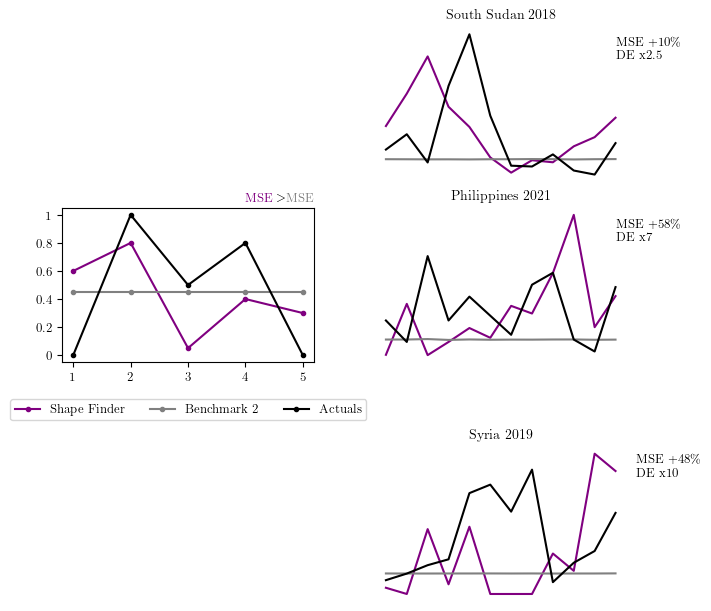

In [67]:
d_diff = d_nn-d_b2
d_mse = d_mse[:4,:]

df_plot = pd.DataFrame([d_diff.flatten(),d_mse.flatten()])
df_plot = df_plot.T
df_plot=df_plot.sort_values([0],ascending=False)

fig = plt.figure(constrained_layout=True,figsize=(7,6))
axs = fig.subplot_mosaic([['TopLeft', 'TopRight'],['MiddleLeft', 'MiddleRight'],['BottomLeft', 'BottomRight']],
                          gridspec_kw={'width_ratios':[1,1],'height_ratios':[1,1,1]})

sf=[0.6,0.8,0.05,0.4,0.3]
real=[0,1,0.5,0.8,0]
b2=[0.45,0.45,0.45,0.45,0.45]
axs['MiddleLeft'].plot(sf, label='Shape Finder', marker='o',color='purple',markersize=3)
axs['MiddleLeft'].plot(b2, label='Benchmark 2', marker='o',color='gray',markersize=3)
axs['MiddleLeft'].plot(real,label='Actuals',marker='o',color="black",markersize=3)
axs['MiddleLeft'].set_xticks([0,1,2,3,4],[1,2,3,4,5],size=9)
axs['MiddleLeft'].set_yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1],size=9)
axs['MiddleLeft'].text(3, 1.1, 'MSE', size=9, color="purple")
axs['MiddleLeft'].text(3.55, 1.1, '$>$', size=9, color="black")
axs['MiddleLeft'].text(3.7, 1.1, 'MSE', size=9, color="gray")
axs['MiddleLeft'].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize=9,ncol=3)

axs['TopLeft'].set_xticks([])
axs['TopLeft'].set_yticks([])
axs['TopLeft'].axis('off')

axs['BottomLeft'].set_xticks([])
axs['BottomLeft'].set_yticks([])
axs['BottomLeft'].axis('off')

year=['2021','2020','2019','2018']
ind=[4,1,9]
yea=[3,0,2]
k=0
y=yea[k]
i=pd.DataFrame(d_diff).mean().sort_values(ascending=False).index[ind[k]]
real = tot_df_obs.iloc[y*12:(y+1)*12,i]
sf=tot_df_nn.iloc[y*12:(y+1)*12,i]
b1=tot_df_ar.iloc[y*12:(y+1)*12,i]
b2=tot_df_ar2.iloc[y*12:(y+1)*12,i]
axs['TopRight'].plot(sf, label='Shape Finder', marker='o',color='purple',markersize=0)
axs['TopRight'].plot(b2, label='Benchmark 2', marker='o',color='gray',markersize=0)
axs['TopRight'].plot(real,label='Actuals',marker='o',color="black",markersize=0)
axs['TopRight'].grid(True)
axs['TopRight'].set_title(f"{df_tot_tot.columns[i]} {year[y]}",size=10)
axs['TopRight'].set_xticks([])
axs['TopRight'].set_yticks([])
axs['TopRight'].axis('off')
axs['TopRight'].text(47,0.00022, 'MSE +10\%', size=9, color="black")
axs['TopRight'].text(47,0.0002, 'DE x2.5', size=9, color="black")


k=1
y=yea[k]
i=pd.DataFrame(d_diff).mean().sort_values(ascending=False).index[ind[k]]
real = tot_df_obs.iloc[y*12:(y+1)*12,i]
sf=tot_df_nn.iloc[y*12:(y+1)*12,i]
b1=tot_df_ar.iloc[y*12:(y+1)*12,i]
b2=tot_df_ar2.iloc[y*12:(y+1)*12,i]
axs['MiddleRight'].plot(sf, label='Shape Finder', marker='o',color='purple',markersize=0)
axs['MiddleRight'].plot(b2, label='Benchmark 2', marker='o',color='gray',markersize=0)
axs['MiddleRight'].plot(real,label='Actuals',marker='o',color="black",markersize=0)
axs['MiddleRight'].grid(True)
axs['MiddleRight'].set_title(f"{df_tot_tot.columns[i]} {year[y]}",size=10)
axs['MiddleRight'].set_xticks([])
axs['MiddleRight'].set_yticks([])
axs['MiddleRight'].axis('off')
axs['MiddleRight'].text(11,0.00008, 'MSE +58\%', size=9, color="black")
axs['MiddleRight'].text(11,0.000073, 'DE x7', size=9, color="black")

k=2
y=yea[k]
i=pd.DataFrame(d_diff).mean().sort_values(ascending=False).index[ind[k]]
real = tot_df_obs.iloc[y*12:(y+1)*12,i]
sf=tot_df_nn.iloc[y*12:(y+1)*12,i]
b1=tot_df_ar.iloc[y*12:(y+1)*12,i]
b2=tot_df_ar2.iloc[y*12:(y+1)*12,i]
axs['BottomRight'].plot(sf, label='Shape Finder', marker='o',color='purple',markersize=0)
axs['BottomRight'].plot(b2, label='Benchmark 2', marker='o',color='gray',markersize=0)
axs['BottomRight'].plot(real,label='Actuals',marker='o',color="black",markersize=0)
axs['BottomRight'].grid(True)
axs['BottomRight'].set_title(f"{df_tot_tot.columns[i]} {year[y]}",size=10)
axs['BottomRight'].set_xticks([])
axs['BottomRight'].set_yticks([])
axs['BottomRight'].axis('off')
axs['BottomRight'].text(36,0.000004, 'MSE +48\%', size=9, color="black")
axs['BottomRight'].text(36,0.0000036, 'DE x10', size=9, color="black")

plt.savefig(os.path.join(out_paths["analysis"],f"mse_just.jpeg"),dpi=400,bbox_inches="tight")
plt.show()

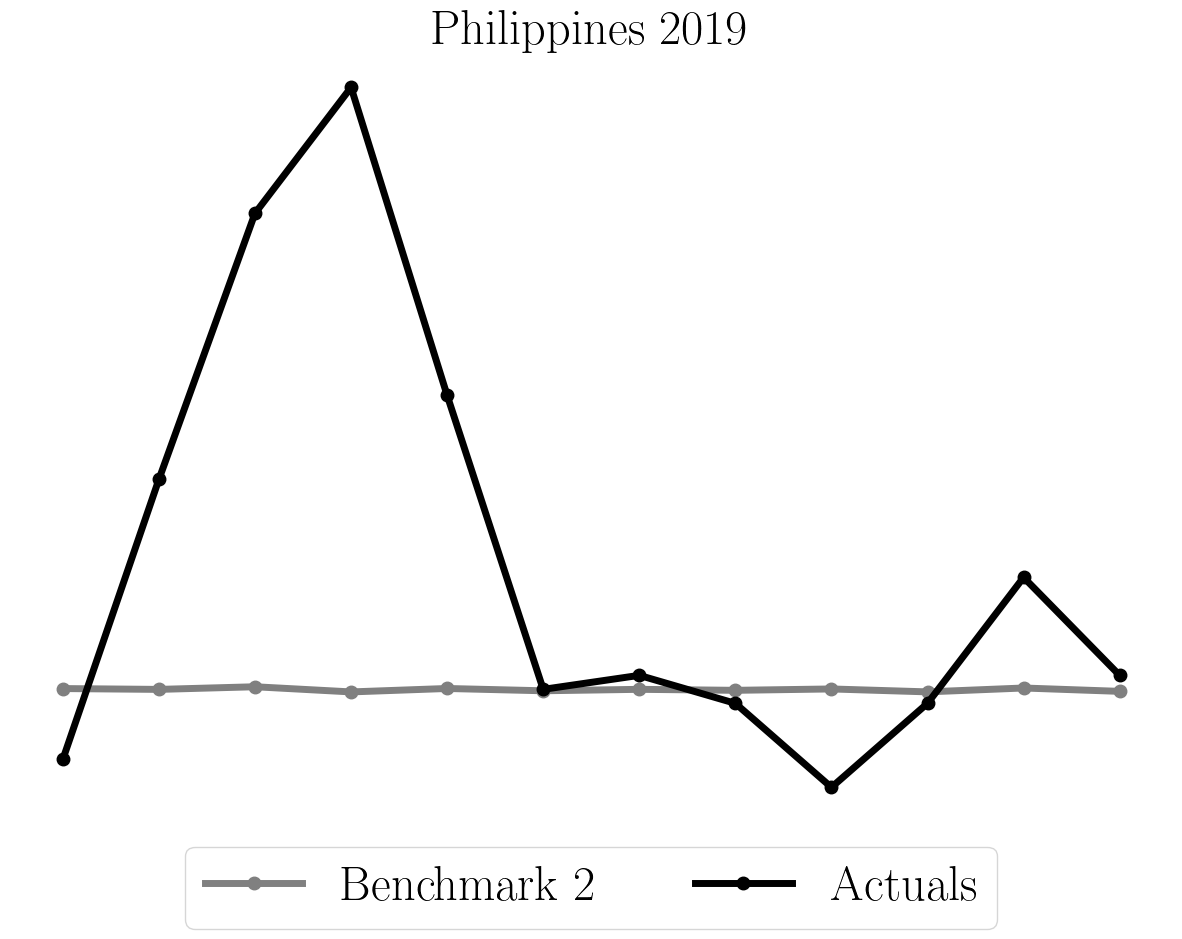

Philippines2019
4.593071810413684
      


In [68]:
year=['2021','2020','2019','2018']
ind=[1]
yea=[2]
for k in range(1):
    y=yea[k]
    i=pd.DataFrame(d_diff).mean().sort_values(ascending=False).index[ind[k]]
    real = tot_df_obs.iloc[y*12:(y+1)*12,i]
    sf=tot_df_nn.iloc[y*12:(y+1)*12,i]
    b1=tot_df_ar.iloc[y*12:(y+1)*12,i]
    b2=tot_df_ar2.iloc[y*12:(y+1)*12,i]
    plt.figure(figsize=(15, 10))
    #plt.plot(sf, label='ShapeFinder', marker='o',color='r')
    #plt.plot(b1, label='Bench1', marker='o',color='g')
    plt.plot(b2,label='Benchmark 2', marker='o',color='gray',markersize=9,linewidth=5)
    plt.plot(real,label='Actuals',marker='o',color="black",markersize=9,linewidth=5)
    #plt.legend()
    plt.grid(True)
    plt.title(f"{df_tot_tot.columns[i]} {year[y]}",size=35)
    plt.xticks([])
    plt.yticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0),fontsize=35,ncol=3)
    plt.savefig(os.path.join(out_paths["analysis"],f"benchmark2.jpeg"),dpi=400,bbox_inches="tight")
    plt.show()
    
    print(df_tot_tot.columns[i]+year[y])
    print(d_nn[y,i]/d_b2[y,i])
    print('      ') 



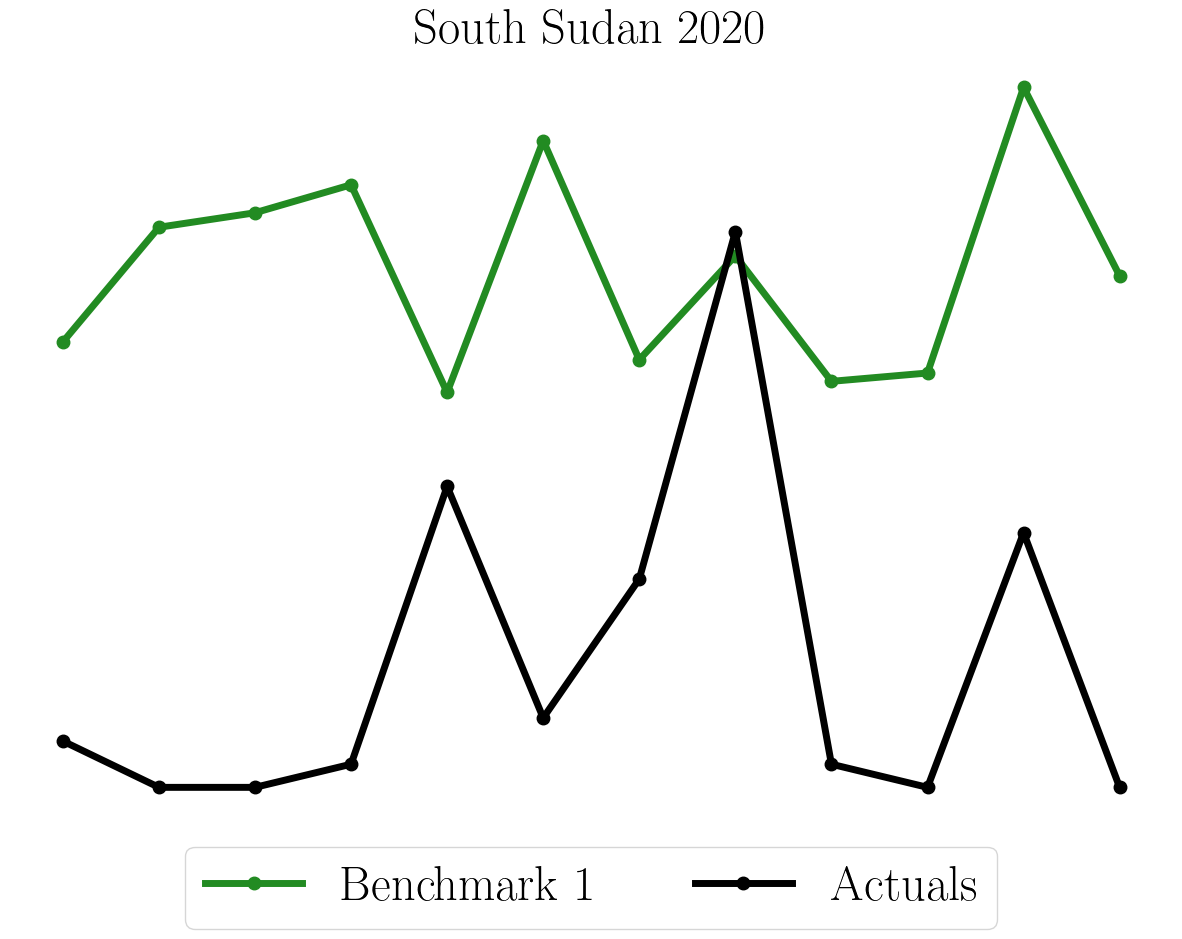

South Sudan2020
6.443916908159113
      


In [69]:
year=['2021','2020','2019','2018']
ind=[4]
yea=[1]
for k in range(1):
    y=yea[k]
    i=pd.DataFrame(d_diff).mean().sort_values(ascending=False).index[ind[k]]
    real = tot_df_obs.iloc[y*12:(y+1)*12,i]
    sf=tot_df_nn.iloc[y*12:(y+1)*12,i]
    b1=tot_df_ar.iloc[y*12:(y+1)*12,i]
    b2=tot_df_ar2.iloc[y*12:(y+1)*12,i]
    plt.figure(figsize=(15, 10))
    #plt.plot(sf, label='ShapeFinder', marker='o',color='r')
    plt.plot(b1, label='Benchmark 1', marker='o',color='forestgreen',markersize=9,linewidth=5)
    #plt.plot(b2, label='Bench2', marker='o',color='b')
    plt.plot(real,label='Actuals',marker='o',color="black",markersize=9,linewidth=5)
    #plt.legend()
    plt.grid(True)
    plt.title(f"{df_tot_tot.columns[i]} {year[y]}",size=35)
    plt.xticks([])
    plt.yticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0),fontsize=35,ncol=3)
    plt.savefig(os.path.join(out_paths["analysis"],f"benchmark1.jpeg"),dpi=400,bbox_inches="tight")
    plt.show()
    
    print(df_tot_tot.columns[i]+year[y])
    print(d_nn[y,i]/d_b2[y,i])
    print('      ') 

190 1


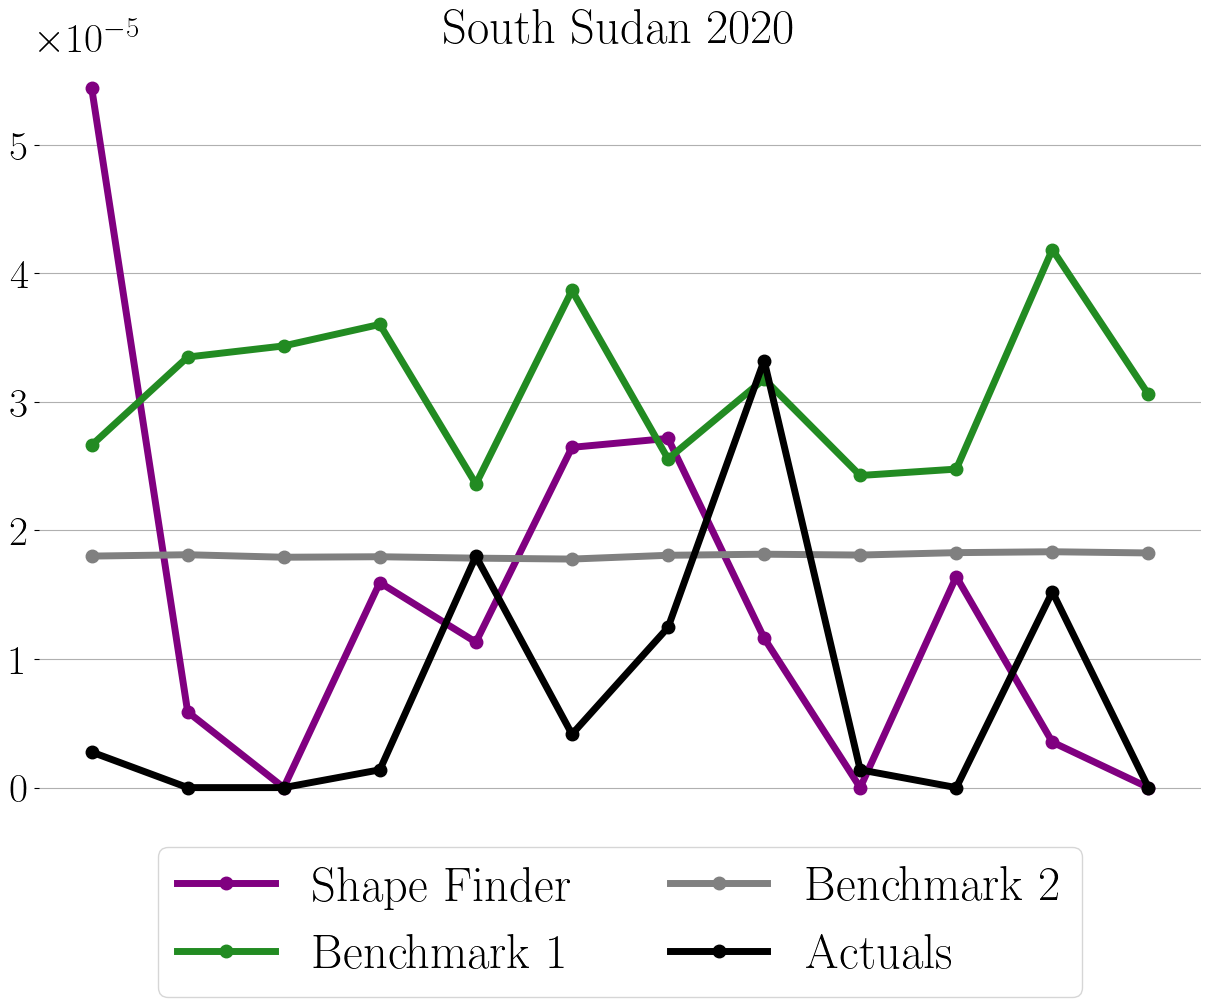

South Sudan2020
6.443916908159113
      
130 2


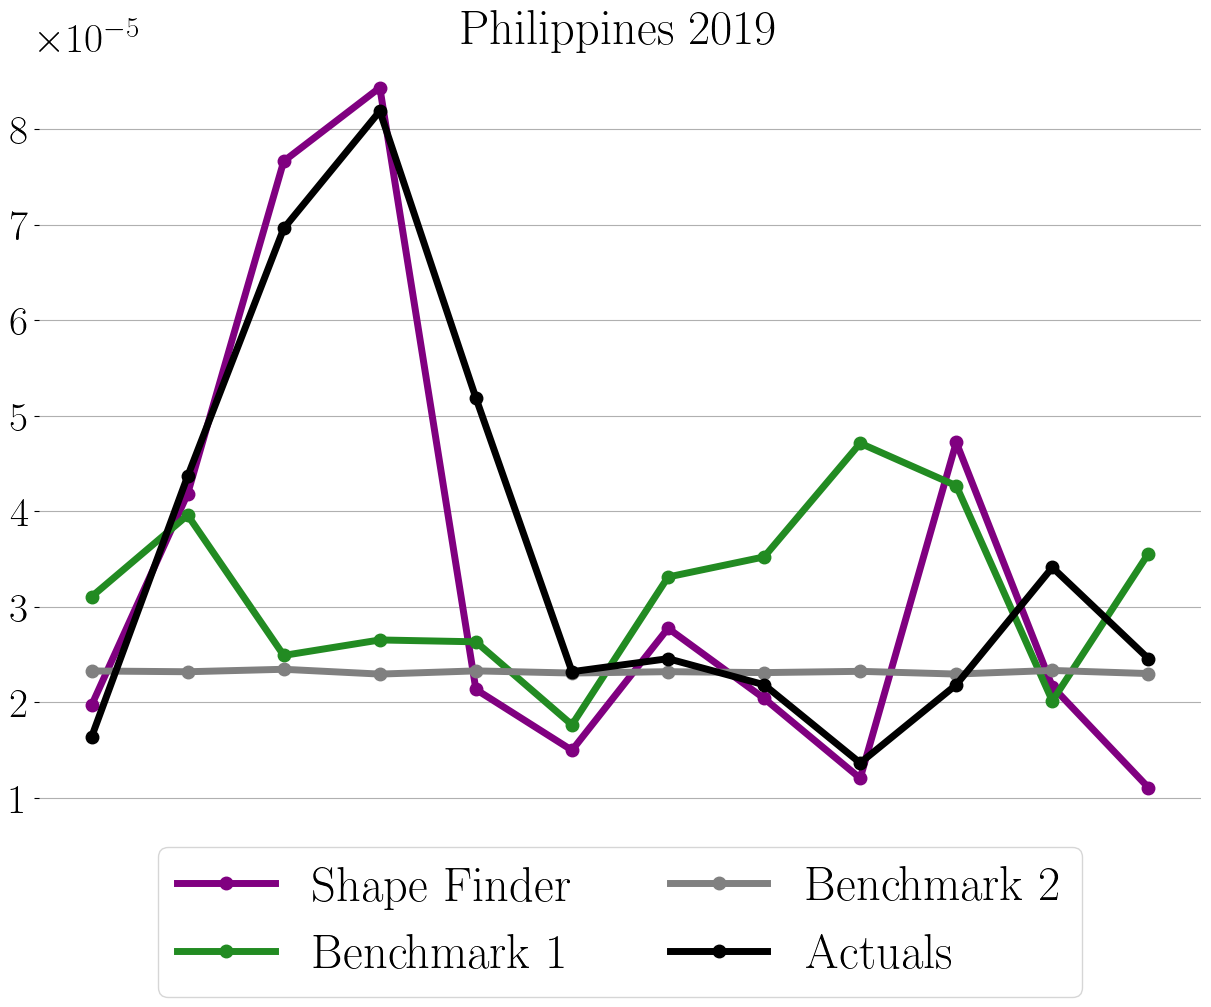

Philippines2019
4.593071810413684
      
177 3


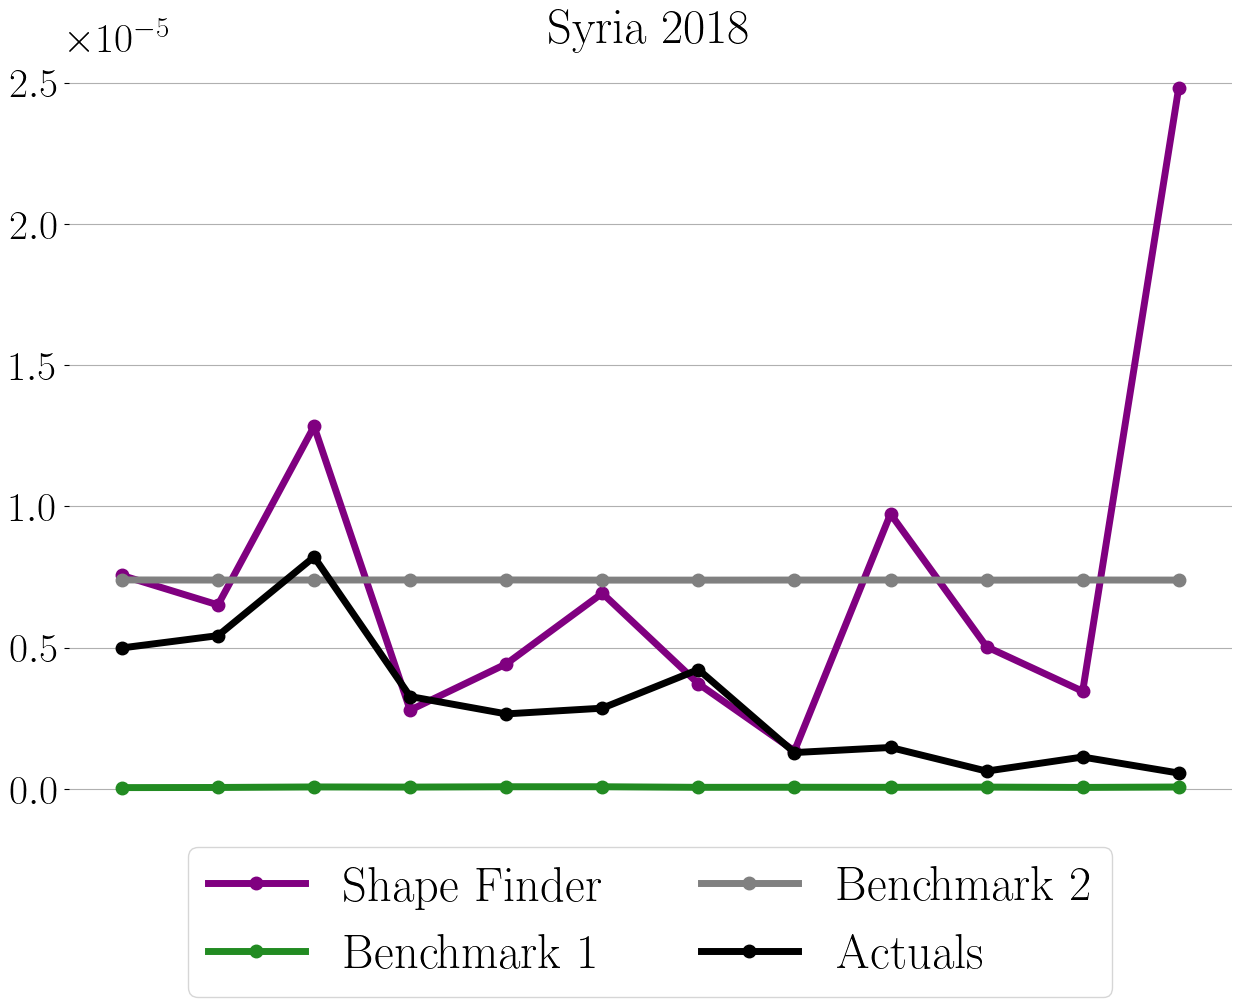

Syria2018
1.4368100098499554
      
110 1


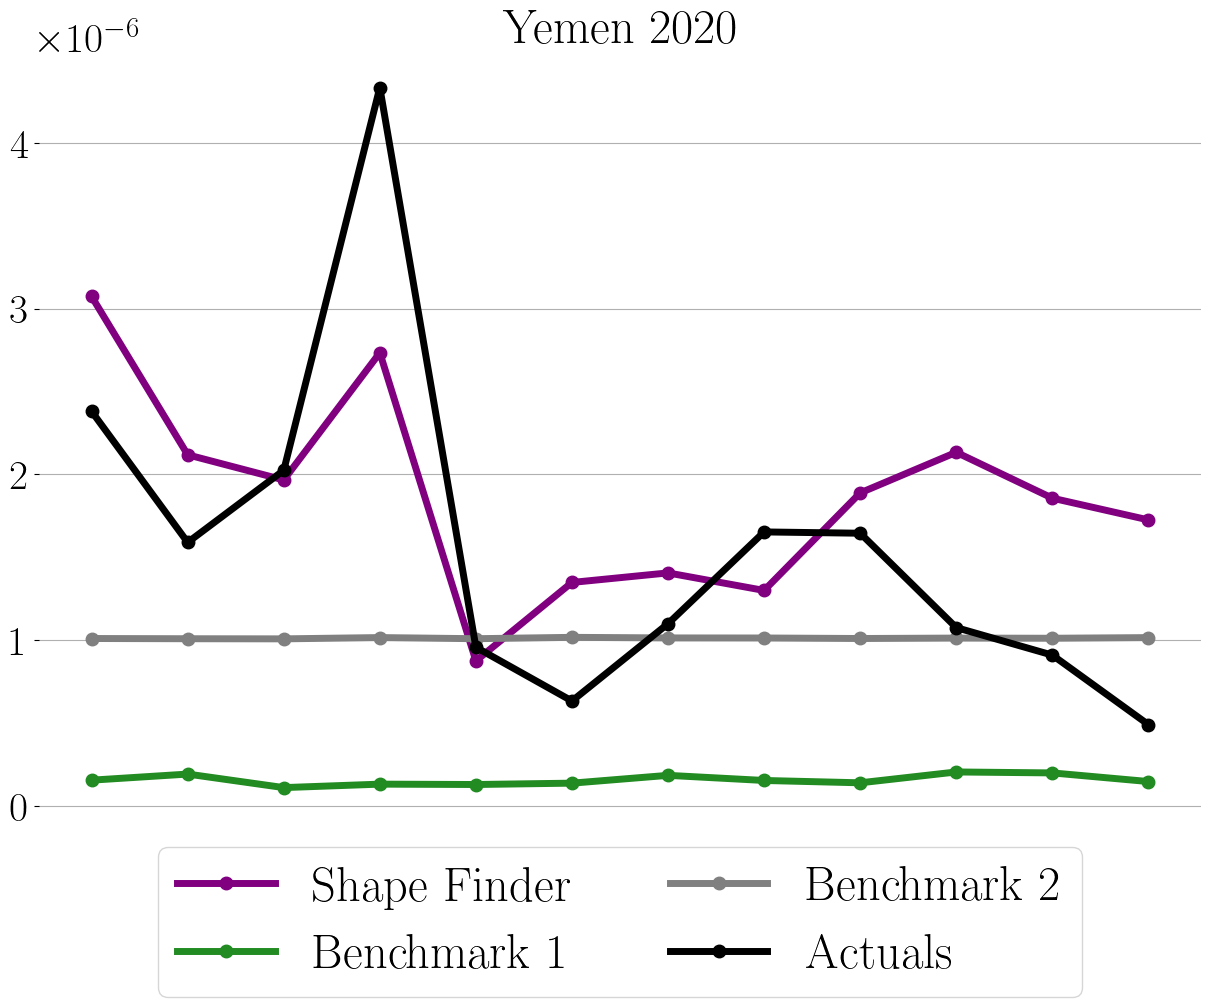

Yemen2020
3.731569872289678
      


In [74]:
year=['2021','2020','2019','2018']
ind=[4,1,9,11]
yea=[1,2,3,1]
for k in range(4):
    y=yea[k]
    i=pd.DataFrame(d_diff).mean().sort_values(ascending=False).index[ind[k]]
    print(i, y)
    real = tot_df_obs.iloc[y*12:(y+1)*12,i]
    sf=tot_df_nn.iloc[y*12:(y+1)*12,i]
    b1=tot_df_ar.iloc[y*12:(y+1)*12,i]
    b2=tot_df_ar2.iloc[y*12:(y+1)*12,i]
    plt.figure(figsize=(15, 10))
    plt.plot(sf, label='Shape Finder', marker='o',color='purple',markersize=9,linewidth=5)
    plt.plot(b1, label='Benchmark 1', marker='o',color='forestgreen',markersize=9,linewidth=5)
    plt.plot(b2, label='Benchmark 2', marker='o',color='gray',markersize=9,linewidth=5)
    plt.plot(real, label='Actuals',marker='o',color="black",markersize=9,linewidth=5)
    #plt.legend()
    plt.grid(True)
    plt.title(f"{df_tot_tot.columns[i]} {year[y]}",size=35)
    plt.xticks([])
    #plt.yticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0),fontsize=35,ncol=2)
    plt.savefig(os.path.join(out_paths["analysis"],f"preds_{df_tot_tot.columns[i]}_{year[y]}.jpeg"),dpi=400,bbox_inches="tight")
    plt.show()

    print(df_tot_tot.columns[i]+year[y])
    print(d_nn[y,i]/d_b2[y,i])
    print('      ')    

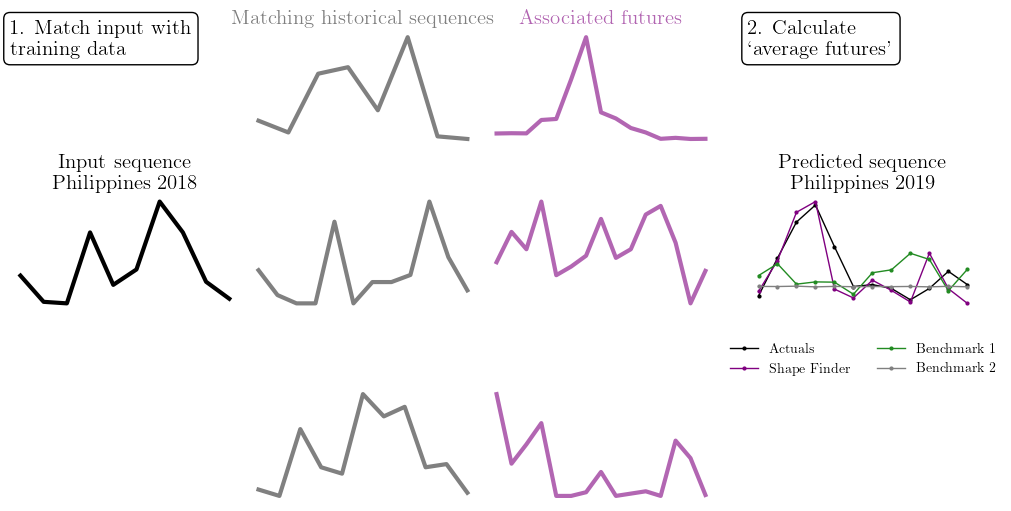

In [88]:

fig = plt.figure(constrained_layout=True,figsize=(10,5))
#gridspec_kw = {'height_ratios': [1,1,1], 'width_ratios': [1,2,1]}
axs = fig.subplot_mosaic([['TopLeft','TopMiddle','TopRight','TopFinal'],['MiddleLeft','MiddleMiddle','MiddleRight','MiddleFinal'],['BottomLeft','BottomMiddle','BottomRight','BottomFinal']],)

axs['TopLeft'].set_xticks([])
axs['TopLeft'].set_yticks([])
axs['TopLeft'].axis('off')
textstr = '\n'.join((
    "1. Match input with",
    "training data"))
axs['TopLeft'].text(0, 0.8,textstr, fontsize=15,bbox=dict(boxstyle='round',facecolor='white'))

axs['MiddleLeft'].plot(df_tot_tot["Philippines"][-49:-39],linewidth=3) # Input
axs['MiddleLeft'].set_title("Input sequence\nPhilippines 2018",size=15)
axs['MiddleLeft'].set_xticks([])
axs['MiddleLeft'].set_yticks([])
axs['MiddleLeft'].axis('off')

axs['BottomLeft'].set_xticks([])
axs['BottomLeft'].set_yticks([])
axs['BottomLeft'].axis('off')


#axs['MiddleFinal'].plot(df_tot_tot["Philippines"][-36:-24].values,label="Actuals",linewidth=3) # Actuals
#axs['MiddleFinal'].plot(tot_df_nn.iloc[2*12:(2+1)*12,130].values,color="purple",label="Shape Finder",linewidth=3) # Actuals
axs['MiddleFinal'].plot(tot_df_obs.iloc[2*12:(2+1)*12,130].values,label="Actuals",linewidth=1,marker="o",markersize=2) # Actuals
axs['MiddleFinal'].plot(tot_df_nn.iloc[2*12:(2+1)*12,130].values,color="purple",label="Shape Finder",linewidth=1,marker="o",markersize=2) # Actuals
axs['MiddleFinal'].plot(tot_df_ar.iloc[2*12:(2+1)*12,130].values,color="forestgreen",label="Benchmark 1",linewidth=1,marker="o",markersize=2) # Actuals
axs['MiddleFinal'].plot(tot_df_ar2.iloc[2*12:(2+1)*12,130].values,color="gray",label="Benchmark 2",linewidth=1,marker="o",markersize=2) # Actuals
axs['MiddleFinal'].set_title("Predicted sequence\nPhilippines 2019",size=15)
axs['MiddleFinal'].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize=10, ncol=2,frameon=False)
axs['MiddleFinal'].set_xticks([])
axs['MiddleFinal'].set_yticks([])
axs['MiddleFinal'].axis('off')

axs['TopFinal'].set_xticks([])
axs['TopFinal'].set_yticks([])
axs['TopFinal'].axis('off')
textstr = '\n'.join((
    "2. Calculate",
    "`average futures'"))
axs['TopFinal'].text(0, 0.8, textstr, fontsize=15,bbox=dict(boxstyle='round',facecolor='white'))

axs['BottomFinal'].set_xticks([])
axs['BottomFinal'].set_yticks([])
axs['BottomFinal'].axis('off')

### TRAIN ###
axs['TopMiddle'].set_title("Matching historical sequences",size=15,color="gray")
plot=pd.read_csv("model_plot.csv")    
axs['TopMiddle'].plot(plot.iloc[:,17],color="gray",linewidth=3) 
axs['TopMiddle'].set_xticks([])
axs['TopMiddle'].set_yticks([])
axs['TopMiddle'].axis('off')

plot=pd.read_csv("model_plot.csv")    
axs['MiddleMiddle'].plot(plot.iloc[:,5],color="gray",linewidth=3) 
axs['MiddleMiddle'].set_xticks([])
axs['MiddleMiddle'].set_yticks([])
axs['MiddleMiddle'].axis('off')

plot=pd.read_csv("model_plot.csv")    
axs['BottomMiddle'].plot(plot.iloc[:,3],color="gray",linewidth=3) 
axs['BottomMiddle'].set_xticks([])
axs['BottomMiddle'].set_yticks([])
axs['BottomMiddle'].axis('off')

### TEST ###
axs['TopRight'].set_title("Associated futures",size=15,color="purple",alpha=0.6)
plot=pd.read_csv("pred_plot.csv")    
axs['TopRight'].plot(plot.iloc[1,1:],color="purple",alpha=0.6,linewidth=3) 
axs['TopRight'].set_xticks([])
axs['TopRight'].set_yticks([])
axs['TopRight'].axis('off')

plot=pd.read_csv("pred_plot.csv")    
axs['MiddleRight'].plot(plot.iloc[9,1:],color="purple",alpha=0.6,linewidth=3) 
axs['MiddleRight'].set_xticks([])
axs['MiddleRight'].set_yticks([])
axs['MiddleRight'].axis('off')

plot=pd.read_csv("pred_plot.csv")    
axs['BottomRight'].plot(plot.iloc[2,1:],color="purple",alpha=0.6,linewidth=3) 
axs['BottomRight'].set_xticks([])
axs['BottomRight'].set_yticks([])
axs['BottomRight'].axis('off')

plt.savefig(os.path.join(out_paths["analysis"],f"inner_workings2.jpeg"),dpi=400,bbox_inches="tight")



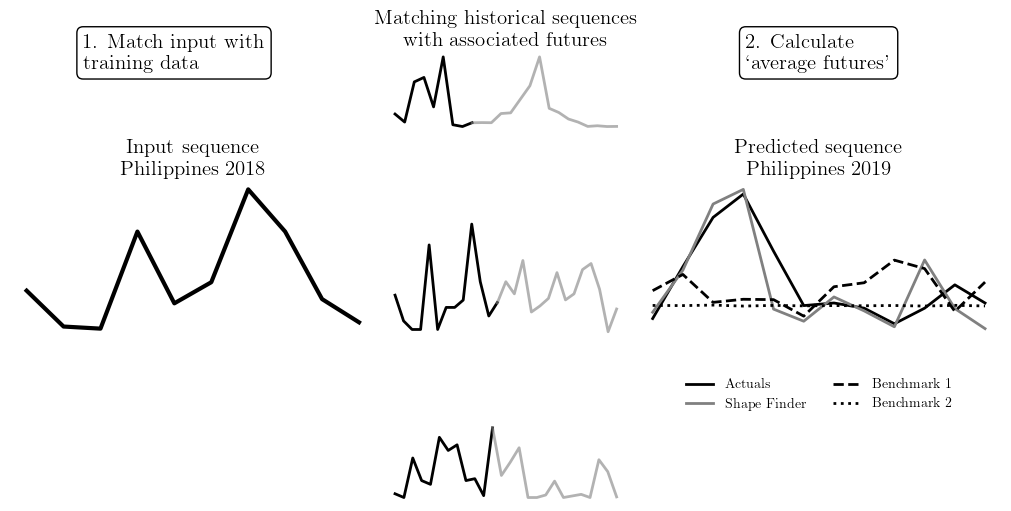

In [219]:

fig = plt.figure(constrained_layout=True,figsize=(10,5))
gridspec_kw = {'height_ratios': [1,2,1], 'width_ratios': [1.5,1,1.5]}
axs = fig.subplot_mosaic([['TopLeft','TopMiddle','TopRight'],['MiddleLeft','MiddleMiddle','MiddleRight'],['BottomLeft','BottomMiddle','BottomRight']],
                        gridspec_kw=gridspec_kw)

axs['TopLeft'].set_xticks([])
axs['TopLeft'].set_yticks([])
axs['TopLeft'].axis('off')
textstr = '\n'.join((
    "1. Match input with",
    "training data"))
axs['TopLeft'].text(0.2, 0.8,textstr, fontsize=15,bbox=dict(boxstyle='round',facecolor='white'))

axs['MiddleLeft'].plot(df_tot_tot["Philippines"][-49:-39],linewidth=3) # Input
axs['MiddleLeft'].set_title("Input sequence\nPhilippines 2018",size=15)
axs['MiddleLeft'].set_xticks([])
axs['MiddleLeft'].set_yticks([])
axs['MiddleLeft'].axis('off')

axs['BottomLeft'].set_xticks([])
axs['BottomLeft'].set_yticks([])
axs['BottomLeft'].axis('off')


#axs['MiddleFinal'].plot(df_tot_tot["Philippines"][-36:-24].values,label="Actuals",linewidth=3) # Actuals
#axs['MiddleFinal'].plot(tot_df_nn.iloc[2*12:(2+1)*12,130].values,color="purple",label="Shape Finder",linewidth=3) # Actuals
axs['MiddleRight'].plot(tot_df_obs.iloc[2*12:(2+1)*12,130].values,label="Actuals",linewidth=2) # Actuals
axs['MiddleRight'].plot(tot_df_nn.iloc[2*12:(2+1)*12,130].values,color="gray",label="Shape Finder",linewidth=2) # Actuals
axs['MiddleRight'].plot(tot_df_ar.iloc[2*12:(2+1)*12,130].values,color="black",label="Benchmark 1",linestyle="dashed",linewidth=2) # Actuals
axs['MiddleRight'].plot(tot_df_ar2.iloc[2*12:(2+1)*12,130].values,color="black",label="Benchmark 2",linestyle="dotted",linewidth=2) # Actuals
axs['MiddleRight'].set_title("Predicted sequence\nPhilippines 2019",size=15)
axs['MiddleRight'].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize=10, ncol=2,frameon=False)
axs['MiddleRight'].set_xticks([])
axs['MiddleRight'].set_yticks([])
axs['MiddleRight'].axis('off')

axs['TopRight'].set_xticks([])
axs['TopRight'].set_yticks([])
axs['TopRight'].axis('off')
textstr = '\n'.join((
    "2. Calculate",
    "`average futures'"))
axs['TopRight'].text(0.3, 0.8, textstr, fontsize=15,bbox=dict(boxstyle='round',facecolor='white'))

axs['BottomRight'].set_xticks([])
axs['BottomRight'].set_yticks([])
axs['BottomRight'].axis('off')

### TRAIN ###
axs['TopMiddle'].set_title("Matching historical sequences\nwith associated futures",size=15,color="black")
plot=pd.read_csv("model_plot.csv")    
plot_pred=pd.read_csv("pred_plot.csv")    
axs['TopMiddle'].plot([0,1,2,3,4,5,6,7,8],np.append(plot.iloc[:,17].dropna(),4.3),color="black",linewidth=2) 
ax1 = axs['TopMiddle'].twinx()
ax1.plot([8,9,10,11,12,14,15,16,17,18,19,20,21,22,23],plot_pred.iloc[1,1:],color="gray",alpha=0.6,linewidth=2) 
axs['TopMiddle'].set_xticks([])
axs['TopMiddle'].set_yticks([])
axs['TopMiddle'].axis('off')
ax1.axis('off')

plot=pd.read_csv("model_plot.csv")    
axs['MiddleMiddle'].plot([0,1,2,3,4,5,6,7,8,9,10,11,12],np.append(plot.iloc[:,5],22),color="black",linewidth=2) 
axs['MiddleMiddle'].set_ylim(-5, 120)  # Adjust x-axis limits
ax2 = axs['MiddleMiddle'].twinx()
plot_pred=pd.read_csv("pred_plot.csv")    
ax2.plot([12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],plot_pred.iloc[9,1:],color="gray",alpha=0.6,linewidth=2) 
ax2.set_ylim(-0.48, 0)  # Adjust x-axis limits
axs['MiddleMiddle'].set_xticks([])
axs['MiddleMiddle'].set_yticks([])
axs['MiddleMiddle'].axis('off')
ax2.axis('off')

plot=pd.read_csv("model_plot.csv")    
axs['BottomMiddle'].plot([0,1,2,3,4,5,6,7,8,9,10,11],np.append(plot.iloc[:,3].dropna(),60),color="black",linewidth=2) 
ax3 = axs['BottomMiddle'].twinx()
plot_pred=pd.read_csv("pred_plot.csv")    
ax3.plot([11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],plot_pred.iloc[2,1:],color="gray",alpha=0.6,linewidth=2) 
axs['BottomMiddle'].set_xticks([])
axs['BottomMiddle'].set_yticks([])
axs['BottomMiddle'].axis('off')
ax3.axis('off')

### TEST ###
#axs['TopMiddle'].set_title("Associated futures",size=15,color="purple",alpha=0.6)
#axs['TopMiddle'].plot(plot.iloc[1,1:],color="purple",alpha=0.6,linewidth=3) 
#axs['TopMiddle'].set_xticks([])
#axs['TopMiddle'].set_yticks([])
#axs['TopMiddle'].axis('off')

#plot=pd.read_csv("pred_plot.csv")    
#axs['MiddleRight'].plot(plot.iloc[9,1:],color="purple",alpha=0.6,linewidth=3) 
#axs['MiddleRight'].set_xticks([])
#axs['MiddleRight'].set_yticks([])
#axs['MiddleRight'].axis('off')

#plot=pd.read_csv("pred_plot.csv")    
#axs['BottomRight'].plot(plot.iloc[2,1:],color="purple",alpha=0.6,linewidth=3) 
#axs['BottomRight'].set_xticks([])
#axs['BottomRight'].set_yticks([])
#axs['BottomRight'].axis('off')

plt.savefig(os.path.join(out_paths["analysis"],f"inner_workings2.jpeg"),dpi=400,bbox_inches="tight")



In [193]:
np.append(plot.iloc[:,17].dropna(),0.495043)

0    14.0
1     5.0
2    50.0
3    55.0
4    22.0
5    78.0
6     2.0
7     0.0
Name: Sierra Leone.1, dtype: float64

In [195]:
plot_pred.iloc[1,1:]

0      0.495043
1      0.531572
2      0.509655
3      2.328776
4      2.467584
5      7.851890
6     13.579564
7      3.366186
8      2.533336
9      1.240225
10     0.633852
11    -0.228222
12    -0.096719
13    -0.250139
14    -0.228222
Name: 1, dtype: float64